# SMS_Spam Classifier

- This Classifier model for Classify the SMS to Spam or Authentic


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import numpy as np
import pickle
from wordcloud import WordCloud,ImageColorGenerator

In [2]:
messages=pd.read_csv('SMS_data',sep='\t',names=['label','message'])

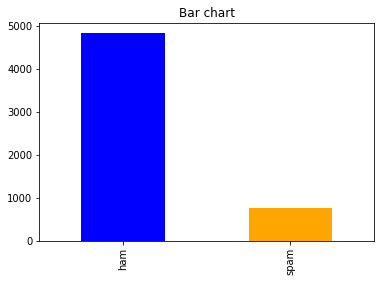

In [3]:
count_Class=pd.value_counts(messages['label'], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

# Data Cleaning and Preprocessing

  1. Remove Special Character and number from data
  2. Lower case all the data 
  3. split the data(sentences) into word 
  4. lematize or stem the words into their root or base and also remove Stop words
  5. Join the processed words into thier documents.

In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer      # also can use stemming


In [5]:
lm=WordNetLemmatizer()
data= []
for i in range(0,len(messages)):
    data_review=re.sub('[^a-zA-Z]',' ',messages['message'][i])
    data_review=data_review.lower()
    data_review=data_review.split()
    data_review=[lm.lemmatize(word) for word in data_review if not word in stopwords.words('english')]
    data_review=" ".join(data_review)
    data.append(data_review)
   

In [6]:
ham_data=messages.loc[messages['label']=='ham']
ham_data=ham_data.drop(['label'],axis=1)
spam_data=messages.loc[messages['label']=='spam']
spam_data=spam_data.drop(['label'],axis=1)


# Text Vectorization

   - process of converting text into vector
   -  Bag of words or TF-IDF model
   
  #### Bag of words
       -it is called bag of words because any order of the words in the document is discarded it only tells us weather word is present in the document or not
       
       -CountVectorizer function we can convert text document to matrix of word count
       
       -After applying the CountVectorizer we can map each word to feature indices
     
  #### TF-IDF
 
      - TF*IDF
      
      -Term Frequency is defined as how frequently the word appear in the document
      
      -Inverse Document frequency is another concept which is used for finding out importance of the word.
          
### Feature Selection
   -Feature Selection is the process where you automatically or manually select those features which contribute most to your prediction variable or output in which you are interested in.
       
   -After Applying Bag of word or TF-IDF model we can select the best features we need as they are sorted accordinly.
 

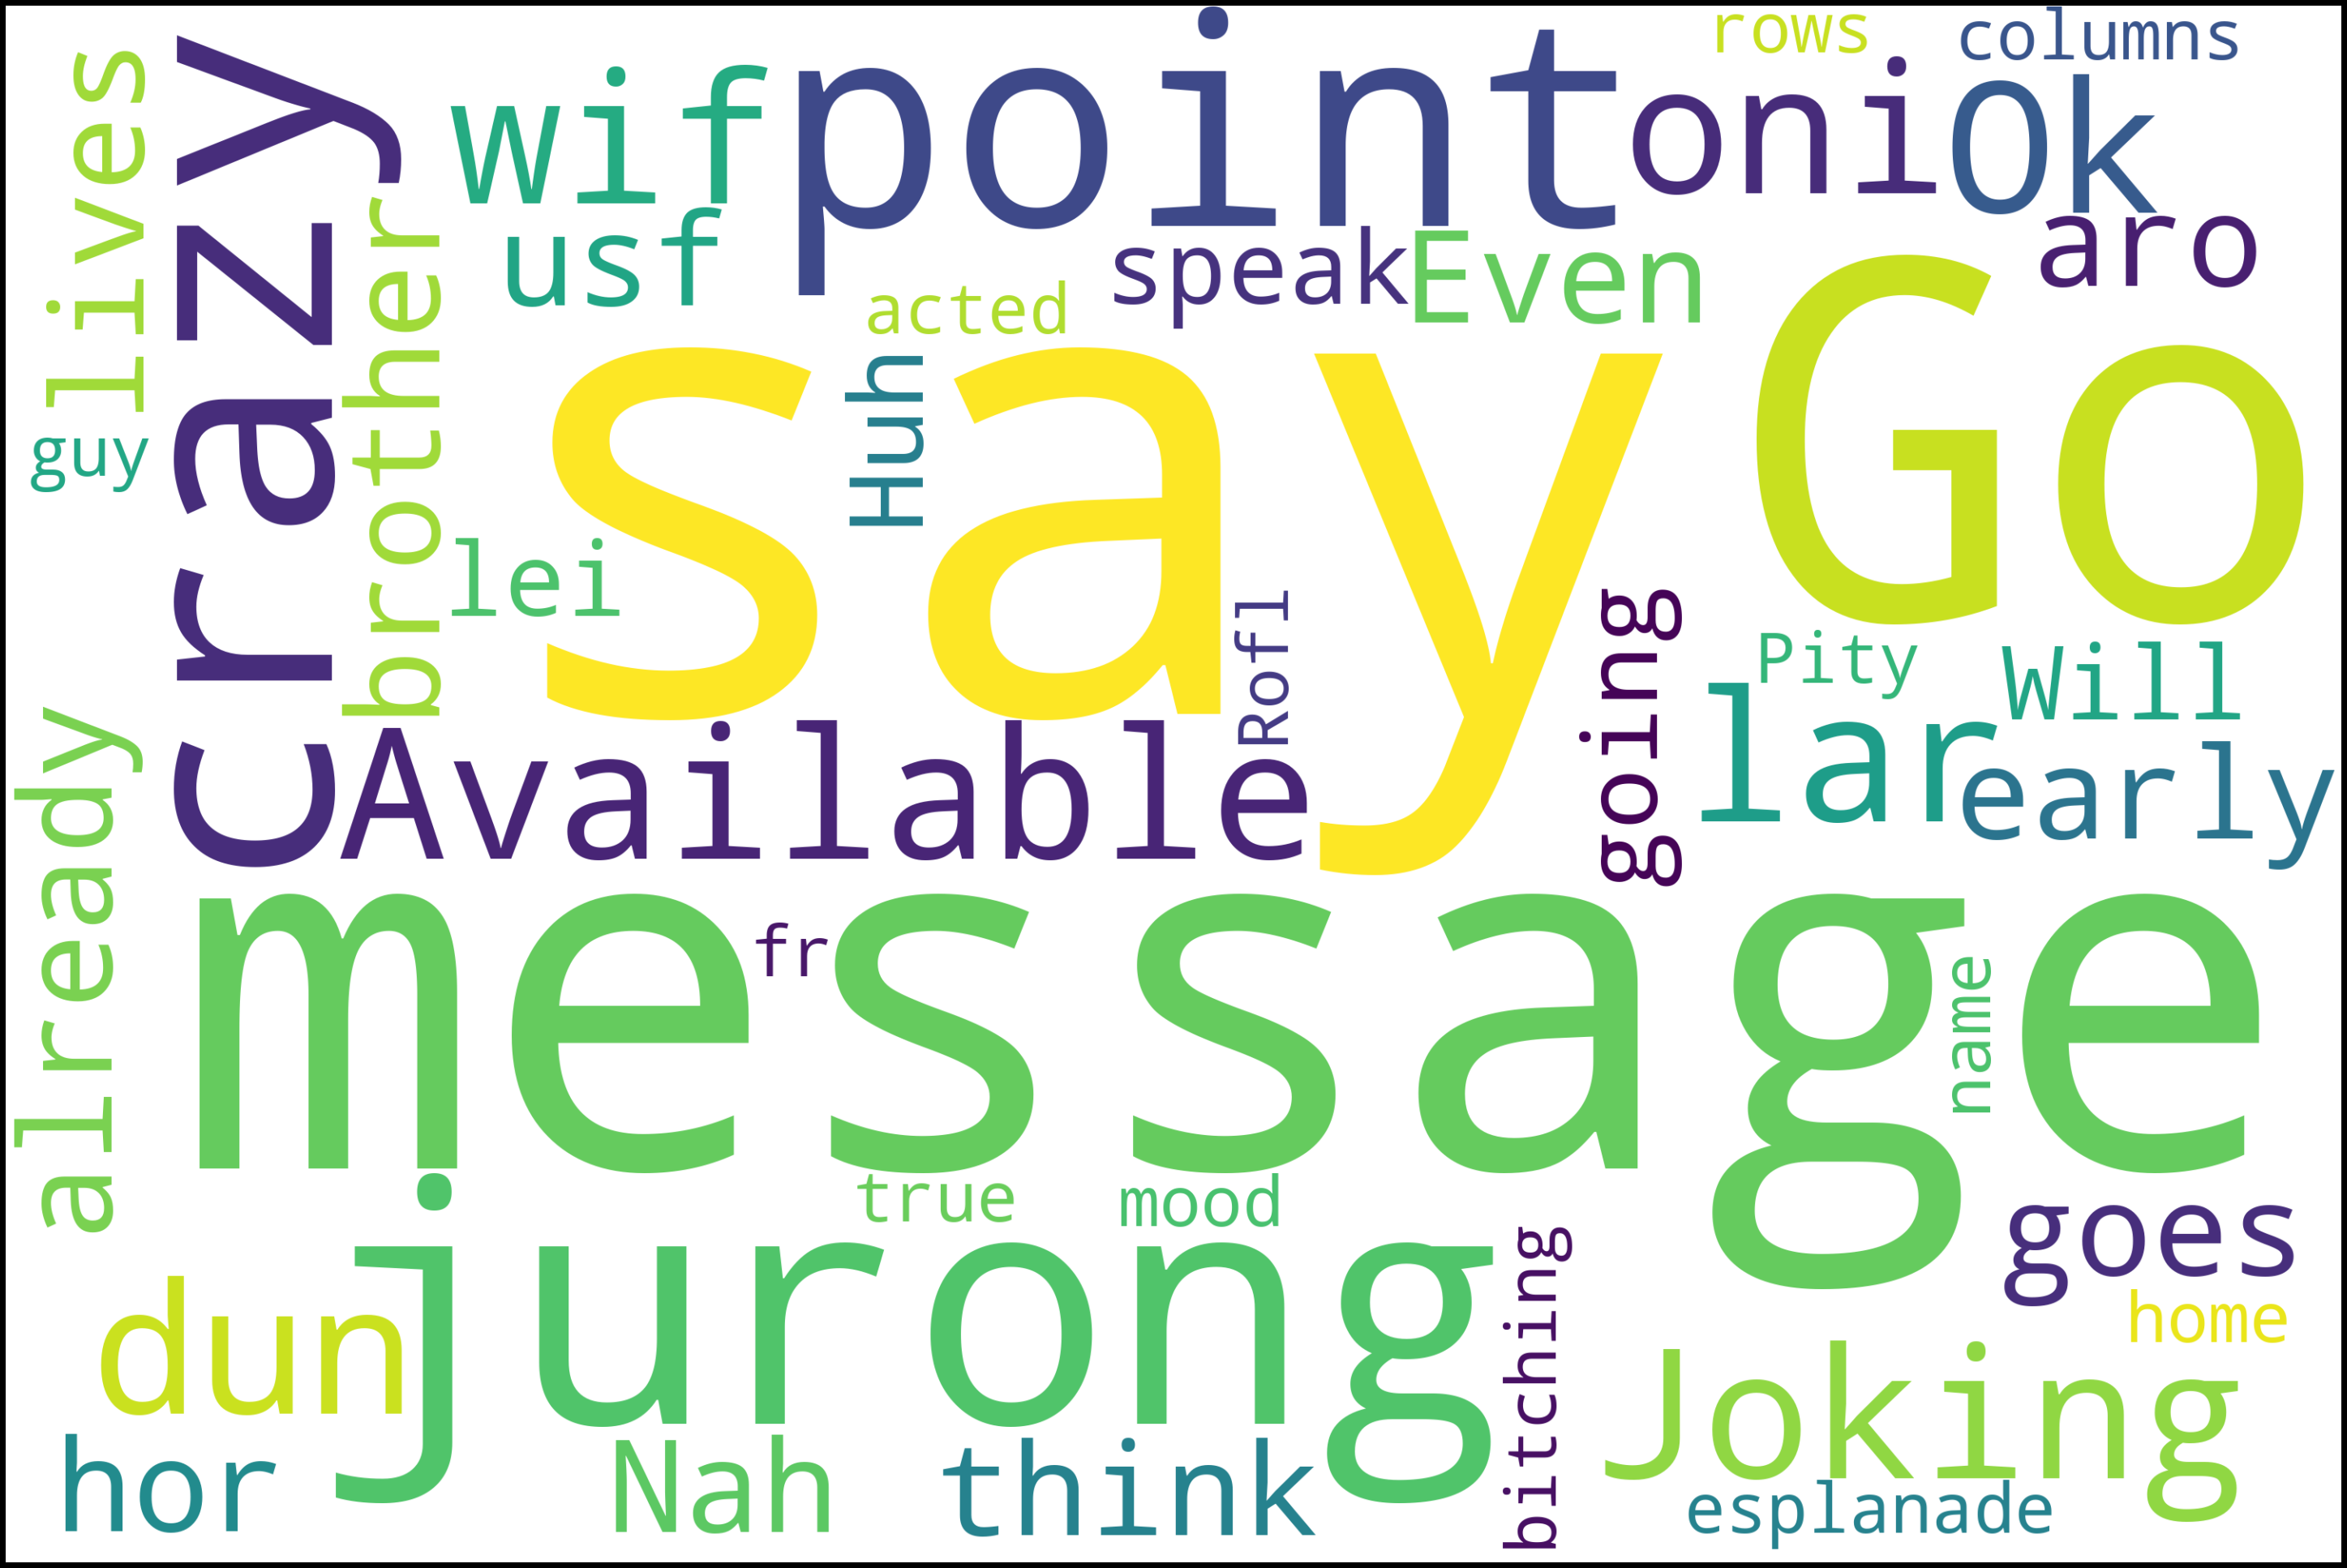

In [7]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text =ham_data
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

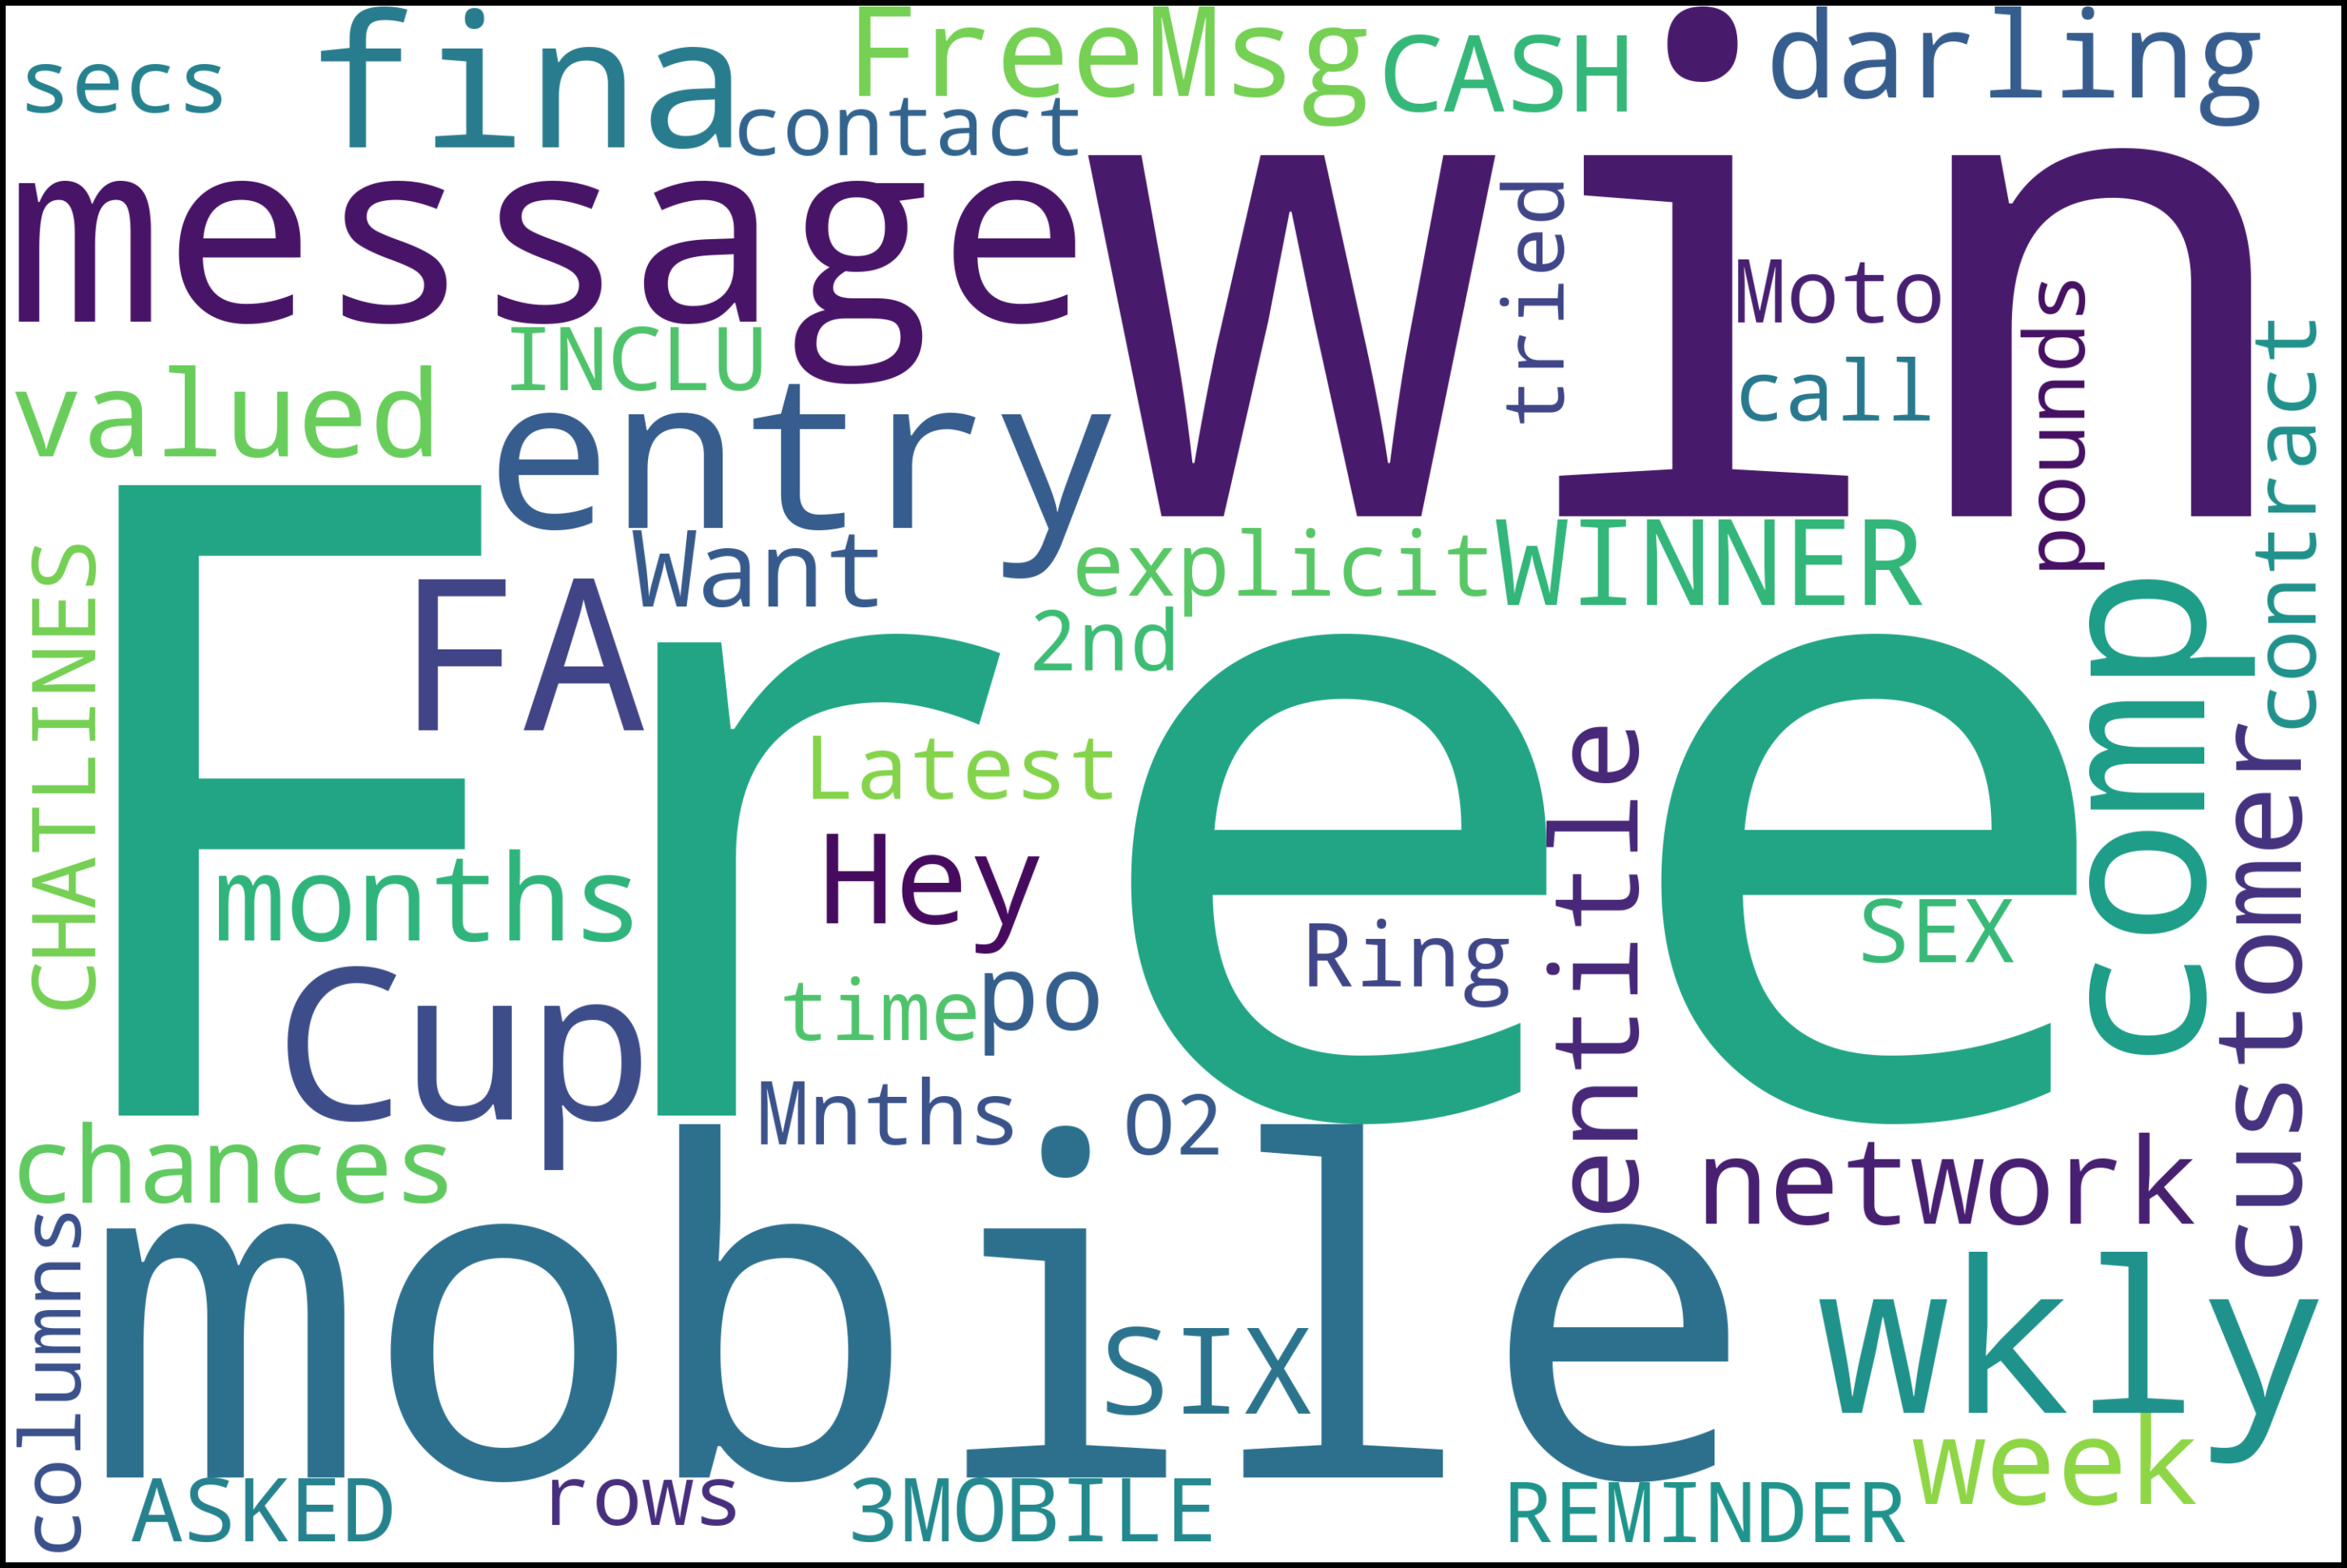

In [8]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text =spam_data
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [9]:
#Creating Bag of Word
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=3000)        #feature selection max_feature=3000
x=cv.fit_transform(data)
pickle.dump(cv, open("cv.pickle", "wb"))

In [10]:
#Alternative of Bag of word  use TF-IDF model

# from sklearn.feature_extraction.text import TfidfVectorizer
# vector=TfidfVectorizer(max_features=4000)
# x=vector.fit_transform(data).toarray()

In [11]:
y=pd.get_dummies(messages['label'])   #give value to labels                               
y=y.iloc[:,1]
b=y.tolist()
b.count(1)

                                                 # Choosing Spam Column where 0=Ham 1=Spa


747

In [12]:
#Train Test Split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=5)
x_train.shape

(4457, 3000)

#  Model Selection
   Model selection is the task of selecting a statistical model from a set of candidate models, given data
   
              Candidate Model
                    -Naive Bayes (MulNominalNB)
                    -Support Vector Machine (SVM)
                    -KNNeighbour 
   

In [13]:
from sklearn.model_selection import cross_val_score      

In [14]:
from sklearn.naive_bayes import MultinomialNB
mulNB=MultinomialNB(alpha=3.0)
score=cross_val_score(mulNB,x,y,cv=5,scoring='accuracy').mean()
score


0.9816945359106681

In [15]:
from sklearn.svm import SVC
svc=SVC()
score=cross_val_score(svc,x,y,cv=5,scoring='accuracy').mean()
score


0.9777459323248342

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
score=cross_val_score(knn,x,y,cv=5,scoring='accuracy').mean()
score


0.9224691854988688

## HyperParameter Selection
   

### Multinominal NB

In [17]:
from sklearn.model_selection import GridSearchCV
parameter=[{'alpha':[0.0,1.0,2.0,3.0,4.0],'fit_prior':['True'],'class_prior':[None]}]
grid_search=GridSearchCV(estimator=mulNB,param_grid=parameter,scoring='accuracy',cv=5).fit(x_train,y_train)

/home/gaurav/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/home/gaurav/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/home/gaurav/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/home/gaurav/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/home/gaurav/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors

In [18]:
grid_search.best_params_

{'alpha': 3.0, 'class_prior': None, 'fit_prior': 'True'}

In [19]:
grid_predictions = grid_search.predict(x_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[962   8]
 [  5 140]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       970
           1       0.95      0.97      0.96       145

    accuracy                           0.99      1115
   macro avg       0.97      0.98      0.97      1115
weighted avg       0.99      0.99      0.99      1115



### Support Vector Machine

In [20]:
from sklearn.model_selection import GridSearchCV
parameter=[{'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}]
grid_search=GridSearchCV(estimator=svc,param_grid=parameter,scoring='accuracy',cv=5).fit(x_train,y_train)

In [21]:
grid_search.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [22]:
grid_predictions = grid_search.predict(x_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[969   1]
 [ 12 133]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       970
           1       0.99      0.92      0.95       145

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



### K Nearest Neighbour

In [23]:
from sklearn.model_selection import GridSearchCV
parameter=[{'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}]
grid_search=GridSearchCV(estimator=knn,param_grid=parameter,scoring='accuracy',cv=5).fit(x_train,y_train)

In [24]:
grid_search.best_params_


{'n_neighbors': 1}

In [25]:
grid_prediction=grid_search.predict(x_test)
print(confusion_matrix(y_test,grid_prediction))
print(classification_report(y_test,grid_prediction))

[[968   2]
 [ 49  96]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       970
           1       0.98      0.66      0.79       145

    accuracy                           0.95      1115
   macro avg       0.97      0.83      0.88      1115
weighted avg       0.96      0.95      0.95      1115



## Model Training
    After selcting suitable model and its desired Hyperparameter Now to Proceed toward fitting Data into the model

In [26]:
#Training Model with Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
spam_detect_model=MultinomialNB(alpha=3.0).fit(x_train,y_train)    #here alpha is for laplace smoothing

### Learning curve
   #####    A learning curve is a plot of model learning performance over experience or time.



In [27]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes = [1, 100, 500,1000, 1500,2000,2500, 3000,3500,4000,4457]
train_sizes, train_scores, validation_scores = learning_curve(estimator = MultinomialNB(),X=x,y=y,train_sizes=train_sizes,cv=5,scoring='accuracy')
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))


Mean training scores

 1       1.000000
100     1.000000
500     0.993600
1000    0.992400
1500    0.993467
2000    0.991900
2500    0.990720
3000    0.990267
3500    0.989771
4000    0.989400
4457    0.988871
dtype: float64

 --------------------

Mean validation scores

 1       0.719749
100     0.945266
500     0.967517
1000    0.973079
1500    0.975771
2000    0.977206
2500    0.977925
3000    0.979361
3500    0.980437
4000    0.980796
4457    0.981514
dtype: float64


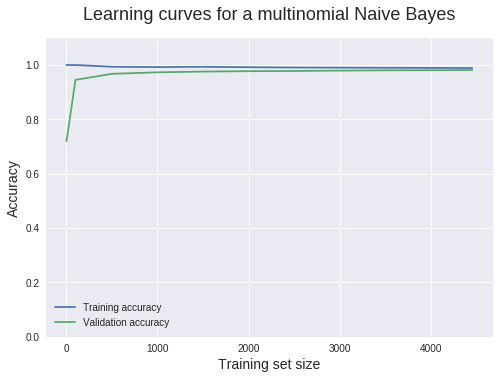

<Figure size 1440x360 with 0 Axes>

In [28]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a multinomial Naive Bayes', fontsize = 18, y = 1.04)
plt.legend()
plt.ylim(0,1.1)
plt.figure(figsize=(20,5))
plt.savefig('train_val_acc')

In [29]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes = [1, 100, 500,1000, 1500,2000,2500, 3000,3500,4000,4457]
train_sizes, train_scores, validation_scores = learning_curve(estimator = MultinomialNB(),X=x,y=y,train_sizes=train_sizes,cv=5,scoring='neg_mean_squared_error')
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))


Mean training scores

 1      -0.000000
100    -0.000000
500     0.006400
1000    0.007600
1500    0.006533
2000    0.008100
2500    0.009280
3000    0.009733
3500    0.010229
4000    0.010600
4457    0.011129
dtype: float64

 --------------------

Mean validation scores

 1       0.280251
100     0.054734
500     0.032483
1000    0.026921
1500    0.024229
2000    0.022794
2500    0.022075
3000    0.020639
3500    0.019563
4000    0.019204
4457    0.018486
dtype: float64


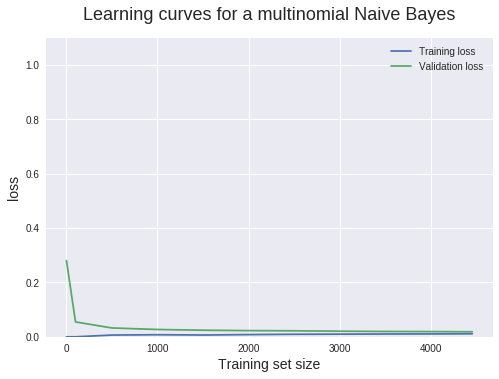

<Figure size 1440x360 with 0 Axes>

In [30]:
plt.plot(train_sizes, train_scores_mean, label = 'Training loss')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation loss')
plt.ylabel('loss', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a multinomial Naive Bayes', fontsize = 18, y = 1.04)
plt.legend()
plt.ylim(0,1.1)
plt.figure(figsize=(20,5))
plt.savefig('train_val_loss')

In [31]:
y_pred=spam_detect_model.predict(x_test)
print(y_pred)


[1 0 1 ... 0 1 0]


In [32]:
#Calculating Confusion Matrix
from sklearn.metrics import confusion_matrix
c_matrix=confusion_matrix(y_test,y_pred)
print(c_matrix)


[[962   8]
 [  5 140]]


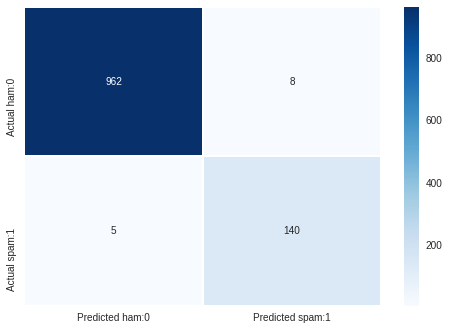

In [33]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=c_matrix, columns=['Predicted ham:0', 'Predicted spam:1'], 
                                 index=['Actual ham:0', 'Actual spam:1'])

sns.heatmap(cm_matrix, annot=True,fmt='d', cmap='Blues',linewidths=1)


In [34]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       970
           1       0.95      0.97      0.96       145

    accuracy                           0.99      1115
   macro avg       0.97      0.98      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [35]:
from sklearn.metrics import accuracy_score     #calculating Accuracy
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.9883408071748879


In [36]:
b=spam_detect_model.predict_proba(x_test)
value=b[:,1]
value

array([1.00000000e+00, 1.84503422e-03, 1.00000000e+00, ...,
       3.26491486e-05, 1.00000000e+00, 1.09493248e-02])

In [37]:
pickle.load(open("cv.pickle", 'rb')) 

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=3000, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

## ROC Curve
     The receiver operating characteristic (ROC) curve is a two dimensional graph in which the false positive rate is plotted on the X axis and the true positive rate is plotted on the Y axis.
     
     The ROC curves are useful to visualize and compare the performance of classifier methods

In [38]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(y_test,spam_detect_model.predict(x_test))
fpr,tpr,threshold=roc_curve(y_test,value)
auc

0.9786349093494491

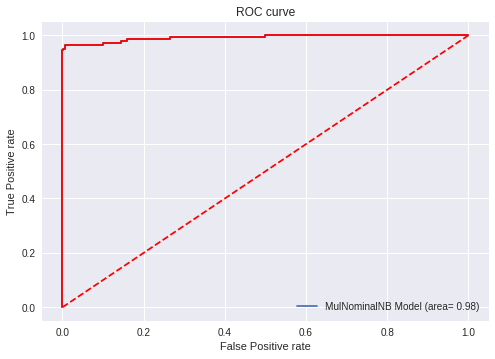

<Figure size 576x396 with 0 Axes>

In [39]:
plt.figure()
plt.plot(fpr,tpr,label="MulNominalNB Model (area= %0.2f)" %  auc)
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr,color='red')
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title('ROC curve')
plt.legend()
plt.show()
plt.savefig('roccurve.jpg')

In [49]:
a=[]
n=input("enter no of msg to send: ")
for i in range(0,int(n)):
    msg=input("Enter your msg:  ")
    msg=msg.lower()
    a.append(msg)
    

enter no of msg to send: 2
Enter your msg:  Hello how are you
Enter your msg:  congrats you will huge discount click here


In [50]:
a_count=cv.transform(a)
prediction=spam_detect_model.predict(a_count)
prediction=prediction.tolist()
prediction=['Not_Spam' if m==0 else 'Spam' for m in prediction]
print(prediction)


['Not_Spam', 'Spam']
